### Feature Extraction And Plotting

In [1]:
import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def extract_features(folder_path, label):
    features = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):  # Assuming your audio files are in .wav format
            file_path = os.path.join(folder_path, filename)
            # Load audio file
            audio, sr = librosa.load(file_path, sr=None)
            # Extract MFCC features
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)  # You can adjust the number of MFCC coefficients as needed
            # Flatten MFCC features and calculate mean
            mfcc_mean = mfcc.mean(axis=1)
            features.append(mfcc_mean)
    # Create DataFrame
    df = pd.DataFrame(features, columns=[f'mfcc_{i+1}' for i in range(len(features[0]))])
    df['label'] = label
    return df

data_path = r"augmented_audios/"
all_data = pd.DataFrame()
for class_folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, class_folder)):
        class_path = os.path.join(data_path, class_folder)
        df = extract_features(class_path, class_folder)
        all_data = pd.concat([all_data, df], ignore_index=True)





In [2]:
import matplotlib.pyplot as plt

def plot_histograms(data):
    classes = data['label'].unique()
    num_features = len(data.columns) - 1  # Exclude the 'label' column
    for i, name in enumerate(data.columns):
        feature_name = name
        feature_min = data[feature_name].min()
        feature_max = data[feature_name].max()
        fig, ax = plt.subplots(figsize=(8, 6))
        for label in classes:
            feature_data = data[data['label'] == label][feature_name]
            ax.hist(feature_data, bins=20, alpha=0.5, label=label, range=(feature_min, feature_max))
        ax.legend()
        ax.set_title(f'MFCC {name} Histogram')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        plt.show()
#plot_histograms(all_data)

In [3]:
import seaborn as sns

def plot_dot_plots(data):
    num_features = len(data.columns) - 1  # Exclude the 'label' column
    features = [f'mfcc_{i+1}' for i in range(num_features)]
    sns.set(style="ticks")

    for i, feature_x in enumerate(features):
        for j, feature_y in enumerate(features):
            if i != j:
                fig, ax = plt.subplots()
                sns.scatterplot(data=data, x=feature_x, y=feature_y, hue='label', ax=ax)
                ax.set_title(f'{feature_x} vs {feature_y}')
                plt.show()

#plot_dot_plots(all_data)

In [31]:
def plot_feature_heatmap(data):
    num_features = len(data.columns) - 1  # Exclude the 'label' column
#     features = [f'mfcc_{i+1}' for i in range(num_features)]
    features=data.columns[:-1]
    
    # Compute the correlation matrix
    corr = data[features].corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Feature Correlation Heatmap')
    plt.show()

def plot_class_feature_heatmaps(data):
    classes = data['label'].unique()
    num_features = len(data.columns) - 1  # Exclude the 'label' column
#     features = [f'mfcc_{i+1}' for i in range(num_features)]
#     features=data.columns
    features=data.columns[:-1]
    
    for label in classes:
        label_data = data[data['label'] == label]
        # Compute the correlation matrix
        corr = label_data[features].corr()

        # Plot heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
        plt.title(f'Feature Correlation Heatmap for {label}')
        plt.show()


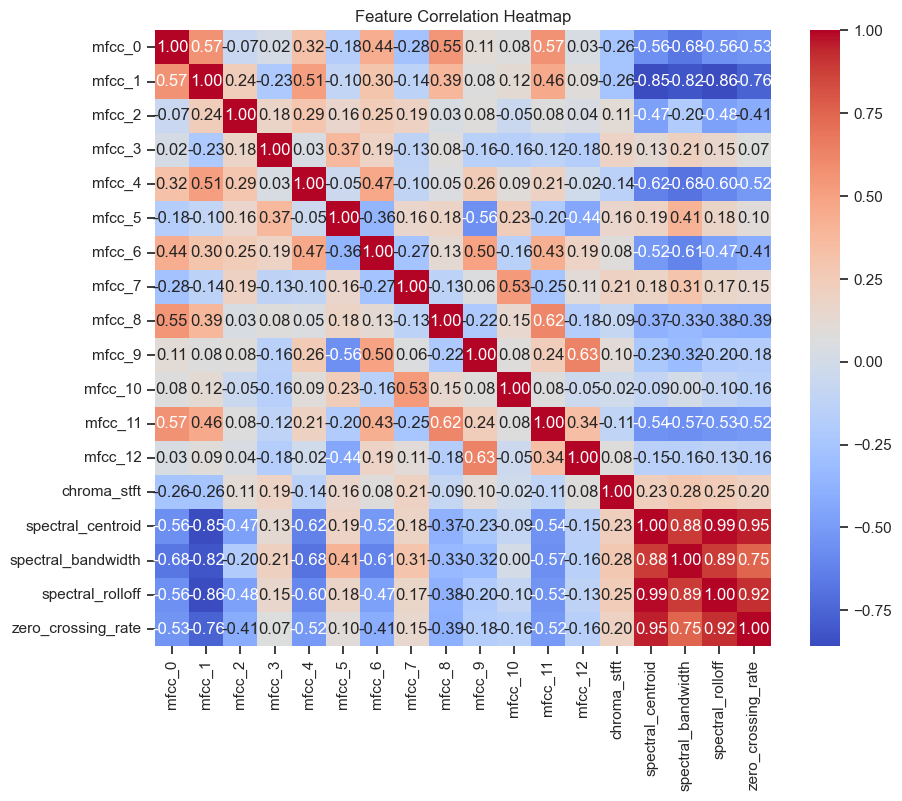

In [32]:
plot_feature_heatmap(all_data)

In [4]:
#plot_class_feature_heatmaps(all_data)

### Extracting Features from augmented data

In [36]:
import os
import pandas as pd
import numpy as np
import librosa

def extract_features(folder_path, label):
    features = []
    headers = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(folder_path, filename)
            audio, sr = librosa.load(file_path, sr=None)
            # Extract features
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
            spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
            spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
            # Calculate means
            mfccs_mean = np.mean(mfccs, axis=1)
            chroma_stft_mean = np.mean(chroma_stft, axis=1)
            spectral_centroid_mean = np.mean(spectral_centroid)
            spectral_bandwidth_mean = np.mean(spectral_bandwidth)
            spectral_rolloff_mean = np.mean(spectral_rolloff)
            zero_crossing_rate_mean = np.mean(zero_crossing_rate)
            # Store feature values
            features.append(list(mfccs_mean) + [chroma_stft_mean[0], spectral_centroid_mean,
                                                spectral_bandwidth_mean, spectral_rolloff_mean,
                                                zero_crossing_rate_mean])
            # Store feature headers
            headers=(['mfcc_' + str(i) for i in range(len(mfccs_mean))] +
                           ['chroma_stft', 'spectral_centroid', 'spectral_bandwidth',
                            'spectral_rolloff', 'zero_crossing_rate'])

    df = pd.DataFrame(features, columns=headers)
    df['label'] = label
    return df

data_path = r"augmented_audios/"
all_data = pd.DataFrame()
for class_folder in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, class_folder)):
        class_path = os.path.join(data_path, class_folder)
        df = extract_features(class_path, class_folder)
        all_data = pd.concat([all_data, df], ignore_index=True)

# Print headers and up to 20 examples for each feature
for col in all_data.columns:
    print(f"Feature: {col}")
    if col != 'label':
        examples = all_data[col].values
        print(examples)
    print()




Feature: mfcc_0
[-279.31384 -266.43973 -266.48407 -270.2206  -274.46405 -258.6765
 -252.32593 -261.2181  -247.94165 -256.17938 -257.95892 -254.56012
 -250.69917 -261.33652 -264.61295 -270.76523 -283.36743 -258.54752
 -253.12843 -271.81714 -250.24448 -292.70474 -247.78613 -338.47385
 -311.8312  -287.59167 -283.48718 -294.62756 -318.4149  -264.2017
 -297.93658 -272.7969  -237.9738  -286.3475  -224.52644 -265.14648
 -255.72751 -246.528   -204.2255  -242.68306 -256.0868  -254.48999
 -263.58167 -222.41261 -242.26953 -249.26053 -301.03262 -240.07343
 -245.47295 -206.39528 -326.09375 -397.21744 -255.82248 -302.07175
 -299.26285 -268.88812 -315.99622 -234.62067 -276.3918  -283.09213
 -303.91772 -290.7594  -298.6702  -298.00986 -305.9771  -299.77847
 -291.0586  -274.11523 -278.23956 -332.80453 -290.12088 -294.11932
 -276.23312 -281.15576 -296.75314 -298.97226 -300.6242  -289.741
 -295.96164 -294.22565 -291.59036 -285.64178 -294.9206  -273.59726
 -285.6948  -276.6624  -311.87808 -305.80466 -294.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

def select_best_features(X_train, y_train):
        # Initialize Random Forest classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        # Fit classifier to the data
        clf.fit(X_train, y_train)
        # Select features based on feature importance
        sfm = SelectFromModel(clf)
        sfm.fit(X_train, y_train)
        return sfm

def build_model(input_dim, output_dim):
        model = Sequential([
            Dense(64, input_shape=(input_dim,), activation='relu'),
            Dense(32, activation='relu'),
            Dense(output_dim, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model


# Load your extracted features data
data_path = r"archive_2/"
df = all_data

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Split data into features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
# Select best features for each class
sfm = select_best_features(X_train, y_train)

# Transform features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Build deep learning model
input_dim = X_train_selected.shape[1]
output_dim = len(np.unique(y_train))
model = build_model(input_dim, output_dim)

# Train model
model.fit(X_train_selected, pd.get_dummies(y_train), epochs=1000, batch_size=len(X_train), verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test_selected, pd.get_dummies(y_test))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 941.2528 - accuracy: 0.2406
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 829.2316 - accuracy: 0.2406
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 719.8942 - accuracy: 0.2406
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 612.8202 - accuracy: 0.2406
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 508.8055 - accuracy: 0.2781
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 480.6819 - accuracy: 0.2219
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 466.3882 - accuracy: 0.2469
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 440.8540 - accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 407.1223 - accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 367.3531 - accuracy: 

1/1 [==============================] - 0s 9ms/step - loss: 6.3069 - accuracy: 0.3344
Epoch 83/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.9641 - accuracy: 0.3500
Epoch 84/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.9020 - accuracy: 0.3187
Epoch 85/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.0872 - accuracy: 0.3156
Epoch 86/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.9462 - accuracy: 0.3000
Epoch 87/1000
1/1 [==============================] - 0s 11ms/step - loss: 5.8012 - accuracy: 0.3187
Epoch 88/1000
1/1 [==============================] - 0s 11ms/step - loss: 5.5659 - accuracy: 0.3125
Epoch 89/1000
1/1 [==============================] - 0s 11ms/step - loss: 5.6638 - accuracy: 0.3344
Epoch 90/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.6620 - accuracy: 0.3688
Epoch 91/1000
1/1 [==============================] - 0s 11ms/step - loss: 5.5401 - accuracy: 0.3500
Epoch 92/1000
1/

1/1 [==============================] - 0s 11ms/step - loss: 3.5134 - accuracy: 0.4313
Epoch 164/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8608 - accuracy: 0.4625
Epoch 165/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.6234 - accuracy: 0.4563
Epoch 166/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8795 - accuracy: 0.4563
Epoch 167/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.6372 - accuracy: 0.4281
Epoch 168/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.3170 - accuracy: 0.4281
Epoch 169/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.8702 - accuracy: 0.4125
Epoch 170/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4068 - accuracy: 0.4250
Epoch 171/1000
1/1 [==============================] - 0s 11ms/step - loss: 4.4975 - accuracy: 0.4031
Epoch 172/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.7589 - accuracy: 0.4594
Epoch 173/1

1/1 [==============================] - 0s 9ms/step - loss: 3.6481 - accuracy: 0.3625
Epoch 245/1000
1/1 [==============================] - 0s 10ms/step - loss: 4.2345 - accuracy: 0.4313
Epoch 246/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.7802 - accuracy: 0.4219
Epoch 247/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.5392 - accuracy: 0.5000
Epoch 248/1000
1/1 [==============================] - 0s 10ms/step - loss: 4.8459 - accuracy: 0.4750
Epoch 249/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.7010 - accuracy: 0.4313
Epoch 250/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4040 - accuracy: 0.4875
Epoch 251/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.6706 - accuracy: 0.4688
Epoch 252/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.1225 - accuracy: 0.5281
Epoch 253/1000
1/1 [==============================] - 0s 11ms/step - loss: 5.0978 - accuracy: 0.4406
Epoch 25

1/1 [==============================] - 0s 11ms/step - loss: 1.3060 - accuracy: 0.6500
Epoch 326/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.0698 - accuracy: 0.5656
Epoch 327/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.4851 - accuracy: 0.4969
Epoch 328/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.5602 - accuracy: 0.6469
Epoch 329/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.5342 - accuracy: 0.5375
Epoch 330/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.2522 - accuracy: 0.4250
Epoch 331/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.7983 - accuracy: 0.6406
Epoch 332/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.5493 - accuracy: 0.6375
Epoch 333/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.6417 - accuracy: 0.6719
Epoch 334/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5541 - accuracy: 0.5000
Epoch 335

1/1 [==============================] - 0s 10ms/step - loss: 1.8961 - accuracy: 0.5969
Epoch 407/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.3107 - accuracy: 0.6062
Epoch 408/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.0078 - accuracy: 0.7406
Epoch 409/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.0575 - accuracy: 0.7437
Epoch 410/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.4986 - accuracy: 0.5531
Epoch 411/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.7153 - accuracy: 0.6562
Epoch 412/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.2260 - accuracy: 0.6812
Epoch 413/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.6404 - accuracy: 0.5500
Epoch 414/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.2164 - accuracy: 0.5625
Epoch 415/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.6406 - accuracy: 0.6313
Epoch 416

1/1 [==============================] - 0s 10ms/step - loss: 1.2096 - accuracy: 0.6812
Epoch 488/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.5422 - accuracy: 0.6531
Epoch 489/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.4834 - accuracy: 0.5719
Epoch 490/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.2982 - accuracy: 0.7469
Epoch 491/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.4189 - accuracy: 0.7094
Epoch 492/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.0959 - accuracy: 0.6781
Epoch 493/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.1359 - accuracy: 0.6656
Epoch 494/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.0758 - accuracy: 0.6938
Epoch 495/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.2321 - accuracy: 0.6000
Epoch 496/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.3684 - accuracy: 0.7469
Epoch

1/1 [==============================] - 0s 12ms/step - loss: 1.0862 - accuracy: 0.7312
Epoch 569/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.9415 - accuracy: 0.7031
Epoch 570/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7661 - accuracy: 0.7750
Epoch 571/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.9117 - accuracy: 0.7156
Epoch 572/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.3507 - accuracy: 0.5906
Epoch 573/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.7568 - accuracy: 0.6656
Epoch 574/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.1326 - accuracy: 0.7406
Epoch 575/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.9843 - accuracy: 0.5344
Epoch 576/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.4943 - accuracy: 0.6313
Epoch 577/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.4627 - accuracy: 0.6375
Epoch 5

1/1 [==============================] - 0s 11ms/step - loss: 3.5203 - accuracy: 0.4437
Epoch 650/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.1165 - accuracy: 0.5969
Epoch 651/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.6873 - accuracy: 0.6313
Epoch 652/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.1682 - accuracy: 0.6906
Epoch 653/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.8523 - accuracy: 0.5063
Epoch 654/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.4752 - accuracy: 0.5437
Epoch 655/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.2291 - accuracy: 0.5094
Epoch 656/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.6963 - accuracy: 0.6094
Epoch 657/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.1143 - accuracy: 0.3844
Epoch 658/1000
1/1 [==============================] - 0s 11ms/step - loss: 5.2102 - accuracy: 0.5063
Epoch

1/1 [==============================] - 0s 11ms/step - loss: 0.8377 - accuracy: 0.7219
Epoch 731/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.8050 - accuracy: 0.7750
Epoch 732/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7420 - accuracy: 0.7719
Epoch 733/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7179 - accuracy: 0.7719
Epoch 734/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7107 - accuracy: 0.7750
Epoch 735/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7087 - accuracy: 0.7781
Epoch 736/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7179 - accuracy: 0.7906
Epoch 737/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7363 - accuracy: 0.7688
Epoch 738/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.7860 - accuracy: 0.7750
Epoch 739/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.8459 - accuracy: 0.7094
Epoch 

1/1 [==============================] - 0s 11ms/step - loss: 1.1627 - accuracy: 0.6906
Epoch 812/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.9914 - accuracy: 0.5344
Epoch 813/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.7857 - accuracy: 0.6469
Epoch 814/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.9846 - accuracy: 0.7437
Epoch 815/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.6526 - accuracy: 0.4844
Epoch 816/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.2814 - accuracy: 0.7094
Epoch 817/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.9918 - accuracy: 0.6438
Epoch 818/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.2797 - accuracy: 0.6094
Epoch 819/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.8238 - accuracy: 0.7219
Epoch 820/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.3256 - accuracy: 0.6906
Epoch 8

1/1 [==============================] - 0s 10ms/step - loss: 0.7393 - accuracy: 0.7937
Epoch 893/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.2405 - accuracy: 0.6062
Epoch 894/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.4574 - accuracy: 0.6875
Epoch 895/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.9673 - accuracy: 0.7563
Epoch 896/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.6816 - accuracy: 0.5406
Epoch 897/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.5297 - accuracy: 0.6750
Epoch 898/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8541 - accuracy: 0.7719
Epoch 899/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.8622 - accuracy: 0.5156
Epoch 900/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.2219 - accuracy: 0.7188
Epoch 901/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.0127 - accuracy: 0.7719
Epoch 

1/1 [==============================] - 0s 10ms/step - loss: 0.8610 - accuracy: 0.7688
Epoch 974/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.5995 - accuracy: 0.5562
Epoch 975/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.3724 - accuracy: 0.6875
Epoch 976/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.8733 - accuracy: 0.7688
Epoch 977/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.6091 - accuracy: 0.5531
Epoch 978/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.3536 - accuracy: 0.6938
Epoch 979/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.8685 - accuracy: 0.7688
Epoch 980/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.5908 - accuracy: 0.5594
Epoch 981/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.3491 - accuracy: 0.6938
Epoch 982/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8641 - accuracy: 0.7688
Epoch 